# Chapter08 표본분포와 통계적 추정

- <a href="#8.1모집단과표본">8.1 모집단과 표본</a>
- <a href="#8.2모평균의추정">8.2 모평균의 추정</a>
- <a href="#8.3모비율의추정">8.3 모비율의 추정</a>

In [2]:
# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

### Numpy 균등분포 & 정규분포

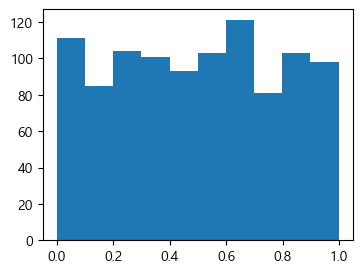

In [3]:
data = np.random.uniform(0,1,1000) # 균등분포(평균, 표준편차, 개수)
plt.hist(data)
plt.show()

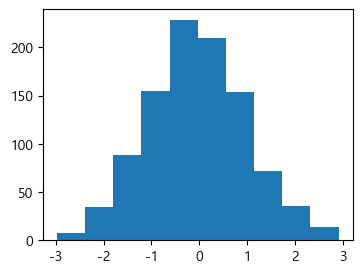

In [4]:
data = np.random.normal(0,1,1000) # 정규분포(평균, 표준편차, 개수)
plt.hist(data)
plt.show()

---------------------

## <a name="8.1모집단과표본">8.1 모집단과 표본</a>

### 모집단 분포와 표본분포

### [실습] 예제 8-1: 모수 구하기 (모평균, 모분산, 모표준편차 )
경부고속도로 서울 요금소~ 부산 구서 나들목에 있는 34개의 나들목 사이의 거리 측정 결과(소수점 셋째자리에서 반올림)

In [5]:
#방법1 : 수학식 사용
data =[9.59, 4.62, 0.65, 7.75, 16.98, 11.78, 7.24, 10.15, 25.49, 11.44, 10.37,
    9.33, 15.04, 12.16, 16.63, 12.06, 9.70, 12.46, 8.05, 19.91, 5.58, 12.48,
    4.35, 16.41, 22.53, 17.56, 18.4, 10.86, 27.43, 7.39, 14.57, 11.92, 2.00]  

mu = sum(data)/len(data)
S2 = 1/len(data) * sum([(i-mu)**2 for i in data])
S  = S2**(1/2) 

print(f'a. 모평균   : {round(mu, 2)}')
print(f'b. 모분산   : {round(S2, 2)}')   # ddof=0 --> n, #ddof=1 --> (n-1)  'delta degrees of freedom'
print(f'c. 모표준편차: {round(S, 2)}')   # ddof=0

a. 모평균   : 12.21
b. 모분산   : 37.35
c. 모표준편차: 6.11


In [6]:
#방법2 : numpy 사용
import numpy as np

data =[9.59, 4.62, 0.65, 7.75, 16.98, 11.78, 7.24, 10.15, 25.49, 11.44, 10.37,
    9.33, 15.04, 12.16, 16.63, 12.06, 9.70, 12.46, 8.05, 19.91, 5.58, 12.48,
    4.35, 16.41, 22.53, 17.56, 18.4, 10.86, 27.43, 7.39, 14.57, 11.92, 2.00]  

data = np.array(data)

print(f'a. 모평균   : {round(data.mean(), 2)}')
print(f'b. 모분산   : {round(data.var(), 2)}')   # ddof=0 --> n, #ddof=1 --> (n-1)  'delta degrees of freedom'
print(f'c. 모표준편차: {round(data.std(), 2)}')   # ddof=0

a. 모평균   : 12.21
b. 모분산   : 37.35
c. 모표준편차: 6.11


In [7]:
# 방법3 : pandas 사용
import pandas as pd

df = pd.Series(data)
data = df.values

print(f'a. 모평균   : {round(data.mean(), 2)}')
print(f'b. 모분산   : {round(data.var(ddof=0), 2)}')
print(f'c. 모표준편차: {round(data.std(ddof=0), 2)}')

a. 모평균   : 12.21
b. 모분산   : 37.35
c. 모표준편차: 6.11


In [8]:
# 방법4 : pandas 사용 - 파일 읽어서 처리
import pandas as pd

df = pd.read_csv("data/distance.csv", header=None)
df.columns = ['거리']
data =  df.거리  # df['거리'] 

print(f'a. 모평균   : {round(data.mean(), 2)}')
print(f'b. 모분산   : {round(data.var(ddof=0), 2)}')
print(f'c. 모표준편차: {round(data.std(ddof=0), 2)}')

FileNotFoundError: [Errno 2] No such file or directory: 'data/distance.csv'

### [실습] 예제 8-2 : 표본 통계량 구하기
sample = 7.75, 9.70, 10.86

In [ ]:
# 방법1 : 수학식 사용
sample = [7.75, 9.70, 10.86]
x_ = sum(sample) / len(sample)
print(f'a. 표본평균   : {round(x_, 2)}')

S2 = 1/(len(sample) -1) *  sum([(i - x_)**2 for i in sample ])
print(f'a. 표본분산   : {round(S2, 2)}')

S = S2**(1/2)
print(f'a. 표본표준편차: {np.round(S, 2)}')

a. 표본평균   : 9.44
a. 표본분산   : 2.47
a. 표본표준편차: 1.57


In [ ]:
# 방법2 : numpy 사용
import numpy as np

sample = [7.75, 9.70, 10.86]
n = np.array(sample)

print(f'a. 표본평균   : {round(n.mean(), 2)}')
print(f'a. 표본분산   : {round(n.var(ddof=1), 2)}')
print(f'a. 표본표준편차: {round(n.std(ddof=1), 2)}')

a. 표본평균   : 9.44
a. 표본분산   : 2.47
a. 표본표준편차: 1.57


#### data에서 임의로 3개 추출(비복원 추출)

In [ ]:
sample = np.random.choice(data, 3, replace=False)
print(sample)

print(f'a. 표본평균   : {round(sample.mean(), 2)}')
print(f'a. 표본분산   : {round(sample.var(ddof=1), 2)}')
print(f'a. 표본표준편차: {round(sample.std(ddof=1), 2)}')

[10.37  9.59 11.78]
a. 표본평균   : 10.58
a. 표본분산   : 1.23
a. 표본표준편차: 1.11


### 표본평균의 분포 - 이산균등분포

#### # 경우의 수 : n=2인 표본평균의 경우의 수

In [ ]:
import itertools

n = 2
result = list(itertools.product(([1,2,3,4]), repeat=n)) # 복원추출
print("**경우의 수 : %s개" % len(result))
print(result)

**경우의 수 : 16개
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]


#### # x_set: 확률변수 상태공간 (표본 평균 X_ 가 취할 수 있는 모든 값)

In [ ]:
x_set = [ sum([j for j in i])/n for i in result] 
x_set = list(set(x_set))
x_set.sort()
x_set

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

#### 확률질량함수: f(x)

In [ ]:
def f(x):
    cnt = 0
    for i in result:
        if sum([j for j in i])/n == x:
            cnt += 1
    return cnt / (len(result))

#### 확률변수: X

In [ ]:
X = [x_set, f]

#### 확률: P(prob)

In [ ]:
prob = [f(x_k) for x_k in x_set]
prob

[0.0625, 0.125, 0.1875, 0.25, 0.1875, 0.125, 0.0625]

#### 확률분포표 

In [ ]:
df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
df.columns.names = ['X_']
df

X_,1.0,1.5,2.0,2.5,3.0,3.5,4.0
P(X_=x_),0.0625,0.125,0.1875,0.25,0.1875,0.125,0.0625


#### 평균의 기대값

In [ ]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set]) 

E(X)

2.5

#### 표본평균의 분산

In [ ]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

V(X)

0.625

#### 이항균등분포의 표본평균의 분포 그래프로 나타내기

[-- X=1 --]
**경우의 수 : 4개
**모든 경우 : [(1,), (2,), (3,), (4,)]
**확률분포표:
/X_         1.0   2.0   3.0   4.0
P(X_=x_)  0.25  0.25  0.25  0.25
--------------------------------------------------
[-- X=2 --]
**경우의 수 : 16개
**모든 경우 : [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
**확률분포표:
/X_           1.0    1.5     2.0   2.5     3.0    3.5     4.0
P(X_=x_)  0.0625  0.125  0.1875  0.25  0.1875  0.125  0.0625
--------------------------------------------------
[-- X=3 --]
**경우의 수 : 64개
**모든 경우 : [(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 1), (3, 2, 2), (3, 2, 3),

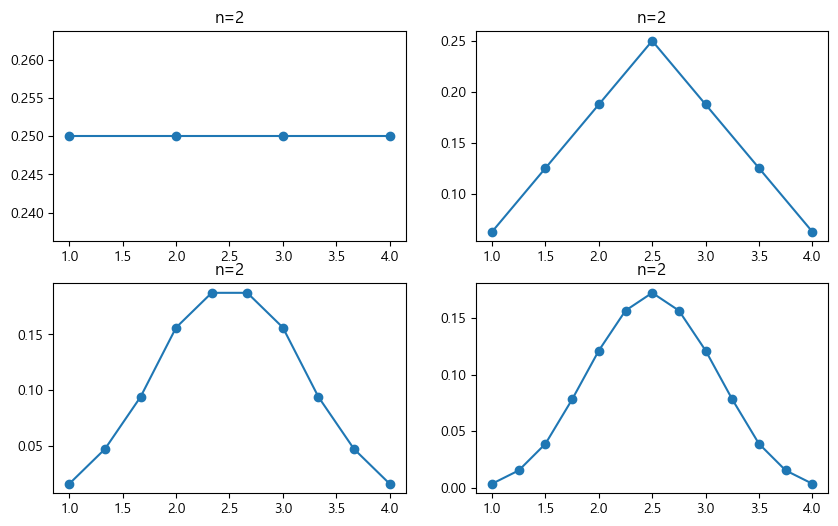

In [ ]:
def get_sample_dist(X, n):
    
    import itertools
    result = list(itertools.product((X), repeat=n)) # 복원추출
    print(f'**경우의 수 : {len(result)}개')
    print(f'**모든 경우 : {result}')


    # 확률변수 상태공간
    x_set = [ sum([j for j in i])/n for i in result] 
    x_set = list(set(x_set))
    x_set.sort()
#     print(f'**모든 확률변수 : {x_set}')

    # 확률질량함수
    def f(x):
        cnt = 0
        for i in result:
            if sum([j for j in i])/n == x:
                cnt += 1
        return cnt / (len(result))

    prob = [f(x_k) for x_k in x_set]
#     print(f'**모든 확률   : {prob}')


    # 확률분포표
    df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
    df.columns.names = ['X_']
    print(f'**확률분포표:\n/{df}')

    return x_set, prob, df


#---------------------
# 그래프로 나타내기 
#---------------------
plt.figure(figsize=(10,6))

X = [1,2,3,4]
for idx, x in enumerate(X): 
    print(f'[-- X={x} --]')
    x_set, prob, df = get_sample_dist(X, x)
    print('-'*50)

    plt.subplot(2, 2, idx+1) 
    plt.plot(x_set, prob, 'o-')
    plt.title(f'n={n}')
    
plt.show() 

In [ ]:
### [실습] 예제 8-3 : 표본평균의 분포

In [ ]:
def get_sample_dist(X, P, n):
    import itertools
    result = list(itertools.product((X), repeat=n)) # 복원추출
    print(f'**경우의 수 : {len(result)}개')
    print(f'**모든 경우 : {result}')

    # 확률질량함수 : 확률구하기    
    def f(x):
        p = 1
        for i in x:
            p *= P[X.index(i)]
        return p
    
    x_set, prob = [], []
    for i in result:
        tmp = sum([j for j in i])/n # 표본평균(-1, -1): (-1+-1)/2 
        if tmp in x_set:
            idx = x_set.index(tmp)
            prob[idx] = prob[idx] + f(i)
        else:
            x_set.append(tmp)
            prob.append(f(i))
    
#     print(f'**표본평균     : {x_set}')
#     print(f'**표본평균 확률: {prob}')


    # 확률분포표
    df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
    df.columns.names = ['X_']
    print(f'**확률분포표:\n/{df}')

    return x_set, prob, df

#---------------------
# 표본평균의 분포

X = [-1, 0, 1]        # 표본
P = [1/3, 1/2, 1/6]   # 표본 확률
x_set, prob, df = get_sample_dist(X, P, n) # 표본평균, 표본평균 확률, 확률분포표
X_mean = sum([x_*prob[idx] for idx, x_ in enumerate(x_set)])
X_var = sum([x_*prob[idx] for idx, x_ in enumerate(x_set)])

print(f'#(a) 표본평균의 분포: {df}')
print(f'#(b) 표본평균의 평균: {X_mean}')
# print(f'#(b) 표본평균의 분산: {df}')

**경우의 수 : 9개
**모든 경우 : [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]
**확률분포표:
/X_            -1.0      -0.5       0.0       0.5       1.0
P(X_=x_)  0.111111  0.333333  0.361111  0.166667  0.027778
#(a) 표본평균의 분포: X_            -1.0      -0.5       0.0       0.5       1.0
P(X_=x_)  0.111111  0.333333  0.361111  0.166667  0.027778
#(b) 표본평균의 평균: -0.16666666666666669


In [ ]:
-1/6

-0.16666666666666666

### [실습] 예제 8-4 : 표본평균의 분포 및 확률 구하기
$N(178, 16)$인 모집단에서 크기 9인 표본 선정, 표본평균 $ \bar{X}$
- a. $\bar{X}$ 분포
- b. $P(\bar{X} \le 180)$ 
- c. $P(176 \le \bar{X} \le 180)$


In [ ]:
import scipy as sp

mu, var, n = 178, 16, 9

print(f'a. 𝑋_분포 : 𝑋_ ~ N({mu, var/n}) ')

rv = sp.stats.norm(loc=mu, scale=(var/n)**(1/2))
rv = sp.stats.norm(loc=mu, scale=np.sqrt(var/n))

print(f'P(X<=180)    : {round(rv.cdf(180), 4)}')
print(f'c.P(176<=X<=180): {round(rv.cdf(180) - rv.cdf(176), 4)}')

a. 𝑋_분포 : 𝑋_ ~ N((178, 1.7777777777777777)) 
P(X<=180)    : 0.9332
c.P(176<=X<=180): 0.8664


#### [실습] $N(166, 9)$인 모집단에서 크기 16인 표본 선정, 표본평균 $ \bar{X}$
- a. $\bar{X}$ 분포
- b. $P(\bar{X} \le 180)$ 
- c. $P(176 \le \bar{X} \le 180)$


In [ ]:
mu, var, n = 166, 9, 16

print(f'a.𝑋¯분포 : 𝑋¯ ~ N({mu, var/n}) ')

rv = sp.stats.norm(loc=mu, scale=(var/n)**(1/2))
rv = sp.stats.norm(loc=mu, scale=np.sqrt(var/n))

print(f'b.P(X<=164)    : {round(rv.cdf(164), 4)}')
print(f'c.P(164<=X<=168): {round(rv.cdf(168) - rv.cdf(164), 4)}')

a.𝑋¯분포 : 𝑋¯ ~ N((166, 0.5625)) 
b.P(X<=164)    : 0.0038
c.P(164<=X<=168): 0.9923


### [실습] 예제 8-5 : 표본비율의 분포 및 확률 구하기
$p=0.45$인 모집단에서 크기 100인 표본 선정, 표본비율 $ \hat{p}$
- a. $ \hat{p}$ 분포
- b. $P(\hat{p} \le 0.35)$ 
- c. $P(0.41 \le \hat{p} \le 0.51)$

In [ ]:
import scipy as sp

n, p, q = 100, 0.45, 0.55
sigma = round(np.sqrt(p*q/n),3)
print(f'n, p, q, sigma : {n, p, q, sigma}')
print(f'a.p^분포 : p^ ~ N({p}, {sigma**2}) ')

rv = sp.stats.norm(loc=p, scale=sigma)

print(f'b.P(X<=0.35)    : {round(rv.cdf(0.35), 4)}')
print(f'c.P(0.41<=X<=0.51): {round(rv.cdf(0.51) - rv.cdf(0.41), 4)}')

n, p, q, sigma : (100, 0.45, 0.55, 0.05)
a.p^분포 : p^ ~ N(0.45, 0.0025000000000000005) 
b.P(X<=0.35)    : 0.0228
c.P(0.41<=X<=0.51): 0.6731


#### [실습] 𝑝=0.45 인 모집단에서 크기 200인 표본 선정, 표본비율 𝑝̂ 
- a. $ \hat{p}$ 분포
- b. $P(\hat{p} \le 0.35)$ 
- c. $P(0.41 \le \hat{p} \le 0.51)$


In [ ]:
n, p, q = 200, 0.45, 0.55
sigma = round(np.sqrt(p*q/n),3)
print(f'n, p, q, sigma : {n, p, q, sigma}')
print(f'a.p^분포 : p^ ~ N({p}, {sigma**2}) ')

rv = sp.stats.norm(loc=p, scale=sigma)

print(f'b.P(X<=0.35)    : {round(rv.cdf(0.35), 4)}')
print(f'c.P(0.41<=X<=0.51): {round(rv.cdf(0.51) - rv.cdf(0.41), 4)}')

n, p, q, sigma : (200, 0.45, 0.55, 0.035)
a.p^분포 : p^ ~ N(0.45, 0.0012250000000000002) 
b.P(X<=0.35)    : 0.0021
c.P(0.41<=X<=0.51): 0.8302


----------------------------------------------------------

## <a name="8.2모평균의추정">8.2 모평균의 추정</a>

### 모평균의 점추정

### [실습] 예제 8-6 : 모평균의 점추정
- 모평균 $\mu$ 에 대한 점추정값 구하기--> 표본평균 x̄ 구하기

In [9]:
import numpy as np

data = [72, 71, 71, 73, 76, 71, 68, 70, 71, 74]
n = np.array(data)

print('모평균 뮤에 대한 점추정값: ')
print(f'a. 표본평균   : {round(n.mean(), 3)}')
print(f'a. 표본분산   : {round(n.var(ddof=1), 3)}')
print(f'a. 표본표준편차: {round(n.std(ddof=1), 3)}')

모평균 뮤에 대한 점추정값: 
a. 표본평균   : 71.7
a. 표본분산   : 4.9
a. 표본표준편차: 2.214


### 모평균의 신뢰구간

#### #모분산이 알려진 정규모집단의 모평균에 대한 신뢰구간

### [실습] 예제 8-7 : 모분산이 알려진 정규모집단의 신뢰구간

In [11]:
Z = {90:1.645, 95:1.96, 99:2.58}   # 중심확률분포

n, x_, var = 25, 30 ,9          # 표본개수, 표본평균, 분산
print(f'n, x_, var : {n, x_, var}')

a = x_ - Z[95] * (np.sqrt(var)/np.sqrt(n)) 
b = x_ + Z[95] * (np.sqrt(var)/np.sqrt(n))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

n, x_, var : (25, 30, 9)
모평균의 신뢰구간 : 28.824 <= mu <= 31.176


### [실습] 

In [12]:
Z = {90:1.645, 95:1.96, 99:2.58}   # 중심확률분포

n, x_, var = 25, 54 ,16          # 표본개수, 표본평균, 분산
print(f'n, x_, var : {n, x_, var}')

a = x_ - Z[99] * (np.sqrt(var)/np.sqrt(n)) 
b = x_ + Z[99] * (np.sqrt(var)/np.sqrt(n))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')


n, x_, var : (25, 54, 16)
모평균의 신뢰구간 : 51.936 <= mu <= 56.064


#### #모분산이 알려지지 않은 정규모집단의 신뢰구간(근사확률분포)

### [실습] 예제 8-8 : 모분산이 알려지지 않은 정규모집단의 신뢰구간

In [13]:
n, x_, sigma = 125, 75, 9        # 표본개수, 표본평균, 표본표준편차
print(f'n, x_, sigma : {n, x_, sigma}')

a = x_ - Z[95] * (sigma/np.sqrt(n)) 
b = x_ + Z[95] * (sigma/np.sqrt(n))
print(f'모평균의 신뢰구간 : {round(a,2)} <= mu <= {round(b,2)}')

n, x_, sigma : (125, 75, 9)
모평균의 신뢰구간 : 73.42 <= mu <= 76.58


### 두 모평균의 신뢰구간

### [실습] 예제 8-9 : 두 모평균 차의 신뢰구간
- 모분산이 알려지지 않았을 때

In [ ]:
n, x_, sigma1 = 56,261.6,21.5**2
m, y_, sigma2 = 44,254.4,
print(f'n, x_, sigma1 : {n, x_, sigma1}')
print(f'm, y_, sigma2 : {m, y_, sigma2}')

a = (x_-y_) - Z[95] * np.sqrt(sigma1**2/n + sigma2**2/m) 
b = (x_-y_) + Z[95] * np.sqrt(sigma1**2/n + sigma2**2/m) 
print(f'두 모평균 차의 신뢰구간 : {round(a,2)} <= x_ - y_ <= {round(b,2)}')

### [실습]
- 모분산이 알려졌을 때

----------------------------------------------------------

## <a name="8.3모비율의추정">8.3 모비율의 추정</a>

### 모비율의 신뢰구간

### [실습] 예제 8-10 : 모비율의 신뢰구간

In [ ]:
Z = {90:1.645, 95:1.96, 99:2.58}

n, x =  
p, q = round(x/n, 2), round(1-x/n, 2)
print(f'n, x, p, q : {n, x, p, q}')

a = p - Z[95] * np.sqrt((p*q)/n) 
b = p + Z[95] * np.sqrt((p*q)/n)
print(f'모비율의 신뢰구간 : {round(a, 2)} <= p^ <= {round(b, 2)}')

### [실습] 

### 두 모비율의 신뢰구간

### [실습] 예제 8-11 : 두 모비율 차의 신뢰구간

In [ ]:
n, m  =  
p1,p2 =  
q1,q2 =  
print(f'n, p1, q1 : {n, p1, q1}')
print(f'm, p2, q2 : {n, p2, q2}')

a = (p1-p2) - Z[95] * np.sqrt((p1*q1)/n + (p2*q2)/m) 
b = (p1-p2) + Z[95] * np.sqrt((p1*q1)/n + (p2*q2)/m) 
print(p1-p2)
print(Z[95] * np.sqrt((p1*q1)/n + (p2*q2)/m))
print(f'두 모비율 차의 신뢰구간 : {round(a,4)} <= p1-p2 <= {round(b,4)}')

### [실습]

----------------------------------------------------------

끝